In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("heart1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [5]:
from sklearn.preprocessing import StandardScaler
features = ['age', 'slope', 'restecg','fbs']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [7]:

df = pd.concat([principalDf,df[['cp','trestbps','chol','thalach','exang','oldpeak','ca','thal','target',]]], axis = 1)

In [8]:
df.tail()

principal component 1  cp  trestbps  chol  thalach  exang  oldpeak  ca  \
1020              -0.804531   1       140   221      164      1      0.0   0   
1021               0.959669   0       125   258      141      1      2.8   1   
1022               0.125675   0       110   275      118      1      1.0   1   
1023              -0.470603   0       110   254      159      0      0.0   0   
1024              -0.336559   0       120   188      113      0      1.4   1   

      thal  target  
1020     2       1  
1021     3       0  
1022     2       0  
1023     2       1  
1024     3       0

In [9]:
X = df.iloc[:,0:9]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

[0.10915611 0.13715725 0.06148494 0.08607181 0.09028813 0.13522599
 0.12478868 0.15114099 0.10468611]


C:\Users\zahin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<Figure size 640x480 with 1 Axes>

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [11]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[80 23]
 [11 91]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       103
           1       0.80      0.89      0.84       102

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [14]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.8110



In [16]:
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.8146


In [17]:

print(confusion_matrix(y_test,nb_predict_test))  
print("Naive bayes Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

[[81 22]
 [16 86]]
Naive bayes Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.80      0.84      0.82       102

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train,y_train.ravel())

C:\Users\zahin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy for train data: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy for train data: 1.0000



In [20]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy for test data:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy for test data:1.0000



In [21]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[103   0]
 [  0 102]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [22]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy in logistic regression:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy in logistic regression:0.8244

Confusion Matrix
[[81 22]
 [14 88]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       103
           1       0.80      0.86      0.83       102

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



C:\Users\zahin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.tree import DecisionTreeClassifier

lr_model=DecisionTreeClassifier(random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy in desicion tree:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy in desicion tree:1.0000

Confusion Matrix
[[103   0]
 [  0 102]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



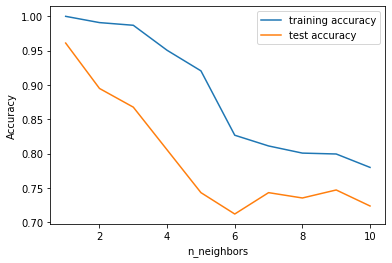

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'target'], df['target'], stratify=df['target'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')


In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.75


In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.988


In [27]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.931
Accuracy on test set: 0.872


In [28]:

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))


Accuracy on training set: 0.982
Accuracy on test set: 0.969


In [29]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))


Accuracy on training set: 0.874
Accuracy on test set: 0.856


In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.83
Accuracy on test set: 0.82


In [31]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.8229



In [33]:
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.8288


In [34]:
print("Naive bayes Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

Naive bayes Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       125
           1       0.81      0.88      0.84       132

    accuracy                           0.83       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.83      0.83      0.83       257



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train.ravel())
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.969


In [36]:
gb_train=gb.predict(X_train)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,gb_train)))
print()

Accuracy: 0.9818



In [37]:
gb_test=gb.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,gb_test)))

Accuracy:0.9689


In [38]:
print("GradientBoosting  Classification Report")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,gb_test))
print("{0}".format(metrics.classification_report(y_test,gb_test)))

GradientBoosting  Classification Report
Confusion Matrix
[[117   8]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       125
           1       0.94      1.00      0.97       132

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257

